In [14]:
import pandas as pd
import sklearn as sklearn
import matplotlib as matplotlib
import numpy as np
pd.set_option('display.max_columns', None)  # show all columns

games = pd.read_csv("../data/processed/adv_nba_data.csv")
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_TEAM,POSS,OFF_RTG,TS_PCT,EFG_PCT,A_TO_RATIO,WIN_FLAG,OFF_RTG_L10,EFG_PCT_L10,TS_PCT_L10,REB_L10,A_TO_RATIO_L10,WIN_FLAG_L10,BLK_L10,STL_L10,OREB_L10,PF_L10,POSS_L10,SEASON_ID_OPP,TEAM_ID_OPP,TEAM_ABBREVIATION_OPP,TEAM_NAME_OPP,GAME_DATE_OPP,MATCHUP_OPP,WL_OPP,MIN_OPP,PTS_OPP,FGM_OPP,FGA_OPP,FG_PCT_OPP,FG3M_OPP,FG3A_OPP,FG3_PCT_OPP,FTM_OPP,FTA_OPP,FT_PCT_OPP,OREB_OPP,DREB_OPP,REB_OPP,AST_OPP,STL_OPP,BLK_OPP,TOV_OPP,PF_OPP,PLUS_MINUS_OPP,HOME_TEAM_OPP,POSS_OPP,OFF_RTG_OPP,TS_PCT_OPP,EFG_PCT_OPP,A_TO_RATIO_OPP,WIN_FLAG_OPP,OFF_RTG_L10_OPP,EFG_PCT_L10_OPP,TS_PCT_L10_OPP,REB_L10_OPP,A_TO_RATIO_L10_OPP,WIN_FLAG_L10_OPP,BLK_L10_OPP,STL_L10_OPP,OREB_L10_OPP,PF_L10_OPP,POSS_L10_OPP,DEF_RTG,NET_RTG,DEF_RTG_OPP,NET_RTG_OPP,TS_DIFF,DEF_RTG_L10,NET_RTG_L10
0,22025,1610612737,ATL,Atlanta Hawks,22500340,2025-12-05,ATL vs. DEN,L,241,133,49,95,0.516,20,46.0,0.435,15,16,0.938,11.0,34.0,45.0,35,8.0,2,12,25,-1.0,1,98.9184,134.454257,0.651705,0.621053,2.916667,0,116.754443,0.563765,0.588422,39.9,2.420332,0.5,4.8,8.8,9.4,20.1,99.82080,22025,1610612743,DEN,Denver Nuggets,2025-12-05,DEN @ ATL,W,239,134,47,89,0.528,16,37.0,0.432,24,30,0.800,9.0,33.0,42.0,28,9.0,6,12,15,1.0,1,100.9920,132.683777,0.655577,0.617978,2.333333,1,130.971657,0.607856,0.644188,43.2,2.475444,0.6,4.5,5.5,10.9,18.9,96.14976,132.683777,1.770480,134.454257,-1.770480,-0.003872,119.202490,-2.448047
1,22025,1610612737,ATL,Atlanta Hawks,22500327,2025-12-03,ATL vs. LAC,L,241,92,34,85,0.400,13,39.0,0.333,11,14,0.786,7.0,31.0,38.0,20,9.0,1,16,17,-23.0,1,96.1536,95.680245,0.504607,0.476471,1.250000,0,120.075432,0.580563,0.604173,40.4,2.520332,0.6,5.3,9.7,9.6,20.2,100.44672,22025,1610612746,LAC,Los Angeles Clippers,2025-12-03,LAC @ ATL,W,241,115,44,89,0.494,10,32.0,0.313,17,20,0.850,13.0,41.0,54.0,29,12.0,1,12,18,23.0,1,92.9280,123.751722,0.587935,0.550562,2.416667,1,115.986233,0.527543,0.584499,41.8,1.756057,0.2,4.2,8.0,9.1,20.8,99.85152,123.751722,-28.071477,95.680245,28.071477,-0.083327,118.251566,1.823866
2,22025,1610612737,ATL,Atlanta Hawks,22500309,2025-12-01,ATL @ DET,L,241,98,38,89,0.427,14,40.0,0.350,8,11,0.727,7.0,27.0,34.0,27,15.0,4,13,16,-1.0,0,95.8464,102.246928,0.522165,0.505618,2.076923,0,122.837397,0.597648,0.622193,41.5,2.533693,0.7,5.5,9.6,9.6,20.6,101.10336,22025,1610612765,DET,Detroit Pistons,2025-12-01,DET vs. ATL,W,240,99,38,86,0.442,5,26.0,0.192,18,24,0.750,18.0,42.0,60.0,18,11.0,9,22,12,1.0,0,96.5376,102.550716,0.512635,0.470930,0.818182,1,122.838668,0.573194,0.608978,46.0,1.785298,0.8,5.7,10.0,13.4,22.0,100.50048,102.550716,-0.303788,102.246928,0.303788,0.009531,117.560089,5.277309
3,22025,1610612737,ATL,Atlanta Hawks,22500304,2025-11-30,ATL @ PHI,W,288,142,48,104,0.462,15,45.0,0.333,31,41,0.756,14.0,44.0,58.0,36,10.0,6,21,27,8.0,0,123.8784,114.628539,0.581776,0.533654,1.714286,1,122.673614,0.597259,0.620588,39.8,2.634991,0.7,5.7,9.3,8.9,20.1,98.00832,22025,1610612755,PHI,Philadelphia 76ers,2025-11-30,PHI vs. ATL,L,290,134,46,105,0.438,10,44.0,0.227,32,38,0.842,11.0,35.0,46.0,26,14.0,6,18,28,-8.0,0,123.5712,108.439507,0.550444,0.485714,1.444444,0,115.001955,0.527042,0.568508,45.3,1.924352,0.5,6.1,7.6,11.6,20.2,97.82400,108.439507,6.189032,114.628539,-6.189032,0.031333,118.140869,4.532745
4,22025,1610612737,ATL,Atlanta Hawks,22500069,2025-11-28,ATL vs. CLE,W,242,130,48,91,0.527,16,43.0,0.372,18,26,0.692,6.0,32.0,38.0,36,11.0,5,12,14,7.0,1,104.1024,124.877044,0.634518,0.615385,3.000000,1,122.664634,0.595935,0.619483,39.7,2.671355,0.7,5.8,9.5,9.0,20.1,97.37472,22025,1610612739,CLE,Cleveland Cavaliers,2025-11-28,CLE @ ATL,L,240,123,44,95,0.463,17,39.0,0.436,18,20,0.900,14.0,34.0,48.0,29,9.0,4,17,17,-7.0,1,102.5280,119.967228,0.592486,0.552632,1.705882,0,118.347913,0.545305,0.576864,44.8,2.311567,0.6,6.2,7.8,11.6,21.5,99.44448,119.967228,4.909816,124.877044,-4.909816,0.042032,117.234960,5.4296

In [15]:
features = [
    "HOME_TEAM",
    "OFF_RTG_L10",
    "DEF_RTG_L10",
    "NET_RTG_L10",
    "EFG_PCT",
    "EFG_PCT_OPP",
    "TS_PCT",
    "TS_PCT_OPP",
    "REB",
    "OREB",
    "REB_OPP",
    "OREB_OPP",
    "A_TO_RATIO",
    "A_TO_RATIO_OPP",
    "POSS",
    "POSS_OPP",
    "PF",
    "PF_OPP",
]
target = "WIN_FLAG"

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    games[features], games[target], test_size=0.2, shuffle=True, random_state=42
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

acc = accuracy_score(y_test, preds)
auc = roc_auc_score(y_test, preds)
print(f"Accuracy: {acc:.3f}  |  AUC: {auc:.3f}")

Accuracy: 0.957  |  AUC: 0.957


In [16]:
coefs = pipe.named_steps["clf"].coef_[0]
features_scaler = pd.DataFrame({
    "feature": features,
    "coef": coefs,
    "abs_coef": np.abs(coefs)
}).sort_values("abs_coef", ascending=False)

print(features_scaler)

           feature      coef  abs_coef
7       TS_PCT_OPP -7.930831  7.930831
6           TS_PCT  7.867541  7.867541
14            POSS  3.244182  3.244182
15        POSS_OPP -3.230629  3.230629
9             OREB  3.069274  3.069274
11        OREB_OPP -3.053539  3.053539
12      A_TO_RATIO  2.112592  2.112592
13  A_TO_RATIO_OPP -2.070906  2.070906
8              REB -0.880043  0.880043
10         REB_OPP  0.842060  0.842060
5      EFG_PCT_OPP  0.660071  0.660071
4          EFG_PCT -0.653059  0.653059
17          PF_OPP  0.575782  0.575782
16              PF -0.570431  0.570431
1      OFF_RTG_L10  0.051894  0.051894
0        HOME_TEAM -0.050814  0.050814
3      NET_RTG_L10  0.049664  0.049664
2      DEF_RTG_L10 -0.004111  0.004111


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Target: team point differential
games["POINT_DIFF"] = games["PTS"] - games["PTS_OPP"]

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    games[features],
    games["POINT_DIFF"],
    test_size=0.2,
    random_state=42
)

# Modeling pipeline
pipe_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1   # use all CPU cores
    ))
])

# Train the model
pipe_reg.fit(X_train, y_train)

# Predictions
preds = pipe_reg.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, preds)
rmse = mse ** 0.5      # manual square root for RMSE
r2 = r2_score(y_test, preds)

print(f"RMSE: {rmse:.2f} | R²: {r2:.3f}")

RMSE: 4.48 | R²: 0.900


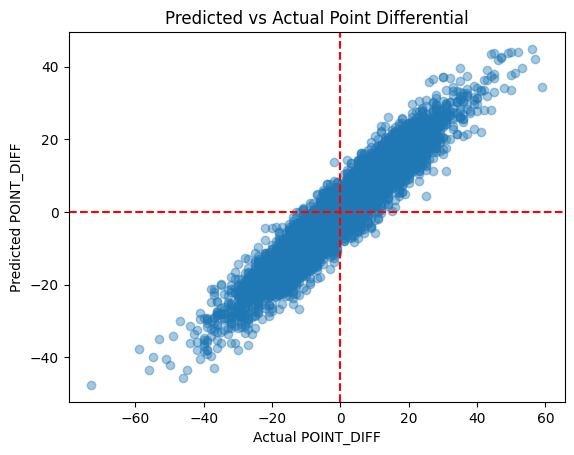

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, preds, alpha=0.4)
plt.xlabel("Actual POINT_DIFF")
plt.ylabel("Predicted POINT_DIFF")
plt.title("Predicted vs Actual Point Differential")
plt.axhline(0, color="red", linestyle="--")
plt.axvline(0, color="red", linestyle="--")
plt.show()

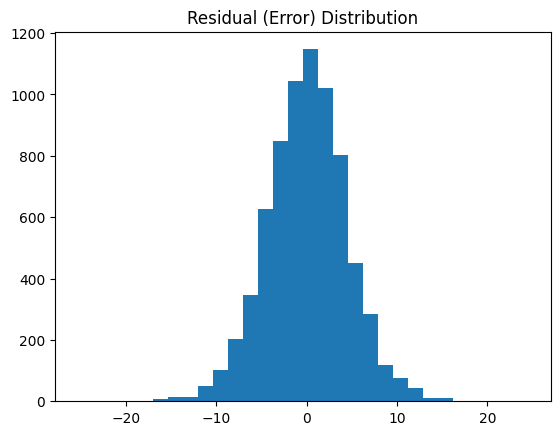

In [19]:
residuals = y_test - preds
residuals.describe()
plt.hist(residuals, bins=30)
plt.title("Residual (Error) Distribution")
plt.show()

In [20]:
importance = pd.DataFrame({
    "feature": features,
    "importance": pipe_reg.named_steps["model"].feature_importances_
}).sort_values("importance", ascending=False)

print(importance)

           feature  importance
7       TS_PCT_OPP    0.331214
6           TS_PCT    0.326627
12      A_TO_RATIO    0.063334
13  A_TO_RATIO_OPP    0.063309
5      EFG_PCT_OPP    0.033041
4          EFG_PCT    0.031971
10         REB_OPP    0.026873
8              REB    0.026015
9             OREB    0.025970
11        OREB_OPP    0.025854
14            POSS    0.007498
15        POSS_OPP    0.007280
3      NET_RTG_L10    0.006345
1      OFF_RTG_L10    0.006252
2      DEF_RTG_L10    0.006003
16              PF    0.005794
17          PF_OPP    0.005689
0        HOME_TEAM    0.000930
